In [7]:
import numpy as np
import networkx as nx
import scipy as sp
import pickle
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd

from collections import defaultdict
from math import*
from scipy.spatial import distance
from scipy.sparse import csr_matrix, spmatrix
from itertools import combinations
import numpy as np
from sklearn.metrics import jaccard_score

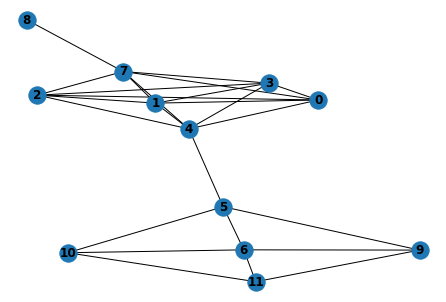

In [4]:
tr = 0.3
nodes = [0,1,2,3,4,5,6,7,8,9]
edges = [(0,1),(0,2),(0,3),(0,4),(0,7),
         (1,2),(1,3),(1,4),(1,7),
         (2,3),(2,4),(2,7),
         (3,4),(3,7),
         (4,7),
         (4,5),
         (5,6),(5,9),(5,10),
         (6,9),(6,10),(6,11),
         (7,8),
         (9,11),
         (10,11),
        ]

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True, font_weight='bold')

In [5]:
A = nx.adjacency_matrix(G)
A = A.todense()
A

matrix([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]], dtype=int64)

In [13]:
def dotSimilarity(fp, vec):
    ''' shared elements between (fp,vec) / number of non-zero elements in vec '''
    return vec.dot(fp).max() / vec.sum()

In [14]:
dotSimilarity(A[0].T,A[1])

0.8

In [70]:
from math import*
from scipy.spatial import distance

def euclidean_distance(fp,vec):
    return distance.euclidean(fp, vec)

def jaccard_distance(fp, vec):
    return distance.jaccard(fp,vec)

def manhattan_distance(fp, vec):
    return distance.cityblock(fp, vec)

def cosine_distance(fp, vec):
    return distance.cosine(fp, vec)

In [123]:
# reference: https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

c = [i for i in range(0, A.shape[0])]
c = list(combinations(c,2))

x = []
y = []
ds = []
ed = []
jd = []
md = []
cd = []

for i in c:
    x.append(i[0])
    y.append(i[1])
    ds.append(dotSimilarity(A[i[0]].T, A[i[1]]))
    ed.append(euclidean_distance(A[i[0]].T, A[i[1]]))
    jd.append(jaccard_distance(A[i[0]].T, A[i[1]]))
    md.append(manhattan_distance(A[i[0]].T, A[i[1]]))
    cd.append(cosine_distance(A[i[0]].T, A[i[1]]))

In [124]:
df = pd.DataFrame(list(zip(x, y, ds, jd, cd, ed, md)), 
               columns =['x', 'y', 'dotSim', 'jacDist', 'cosDist', 'euDist', 'manDist']) 

In [125]:
df.sort_values(by='dotSim', ascending=False)

,x,y,dotSim,jacDist,cosDist,euDist,manDist
63,9,10,1.0,0.00,0.000000,0.000000,0
17,1,8,1.0,0.80,0.552786,2.000000,4
26,2,8,1.0,0.80,0.552786,2.000000,4
7,0,8,1.0,0.80,0.552786,2.000000,4
50,5,11,1.0,0.25,0.133975,1.000000,1
...,...,...,...,...,...,...,...
38,4,5,0.0,1.00,1.000000,3.162278,10
37,3,11,0.0,1.00,1.000000,2.828427,8
36,3,10,0.0,1.00,1.000000,2.828427,8
35,3,9,0.0,1.00,1.000000,2.828427,8


In [104]:
euclidean_distance(np.zeros(A.shape[0]), np.ones(A.shape[0]))

3.4641016151377544

In [105]:
manhattan_distance(np.zeros(A.shape[0]), np.ones(A.shape[0]))

12.0

In [ ]:
jaccard_distance

In [8]:
x = [1,0,0.5555,0.3333]
y = [1,0,1,1]

def jaccardSim(x,y):
    x = np.array(x, dtype=float)*10
    x = np.rint(x)
    y = np.array(y, dtype=float)*10
    y = np.rint(y)
    print(x)
    print(y)
    return jaccard_score(x,y,average='macro')

jaccardSim(x,y)

[10.  0.  6.  3.]
[10.  0. 10. 10.]


0.3333333333333333